In [53]:
import pandas as pd
import numpy as np


In [54]:
df = pd.read_csv('OCM_one_hot.csv')

In [55]:
X = df.copy()
for i in range(0, len(X['Contact time, s'])):
    #print(i)
    time = X['Contact time, s'][i]
    if isinstance(time, str):
        time = time.strip()
    if isinstance(time, str) and '*' in time:
        sci_note = time.split('*')
        sci_note[0] = pd.to_numeric(sci_note[0])
        base, exp = sci_note[1].split('-')
        time = sci_note[0] * pd.to_numeric(base).astype(float)**(-pd.to_numeric(exp))
    X['Contact time, s'][i] = time
X['Contact time, s'] = pd.to_numeric(X['Contact time, s'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [56]:
numberofdata = np.shape(X)[0]
numberoffeatures = np.shape(X)[1]
features = []
labels = []
for i in range(numberofdata):
    labels.append(X.iloc[i][-1])
for i in range(numberofdata):
    feature = []
    for j in range(numberoffeatures-1):
        feature.append(X.iloc[i][j])
    features.append(feature)


## Plot Function

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

def make_nice_plots(Y_test, Y_pred, Y_train, Y_train_pred, model='Neural Network'):
    '''
    Model: class string, represents name of the model
    Y_test: ndarray of test labels
    Y_pred: ndarray of predicted test labels
    Y_train: ndarray of train labels
    Y_pred_train: ndarray of predicted train labels
    '''
    result1 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
    result2 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
    result1['Prediction'] = Y_train_pred
    result1['Actual'] = Y_train
    result1['Type'] = 'Train'
    result2['Prediction'] = Y_pred
    result2['Actual'] = Y_test
    result2['Type'] = 'Test'
    result = result1.append(result2)
    sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)
    #sns.set_context("paper")
    sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
    sns.color_palette("Set2")
    pal=dict(Prediction="#6495ED", Actual="#F08080")
    # Make a custom palette with gendered colors
    pal = dict(Train="#6495ED", Test="#F08080")
    
                    
    fig, ax = plt.subplots()
    sns.axes_style("whitegrid")
        
    g1 = sns.scatterplot(data=result1[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=0.7)
    g2 = sns.scatterplot(data=result2[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=1)
    # Show the survival probability as a function of age and sex
    
    plt.xlabel("Predicted Yield (%)")
    plt.ylabel("Actual Yield (%)")
    plt.legend(loc=4, labels=['Train data', 'Test data'])
    plt.plot([0, 4], [0, 0], linewidth=2)
    max_Y = max([max(Y_test), max(Y_pred), max(Y_train), max(Y_train_pred)]) + 1
    plt.ylim([0,max_Y])
    plt.xlim([0,max_Y])
    diag = [0.0, max_Y]
    plt.plot(diag,diag,'-',color="#C23B23")
    fig.set_size_inches(7, 7)
    fig.savefig("{}.svg".format(model), format='svg', dpi=1200)
make_nice_plots(Y_test, yield_y_pred, Y_train, yield_y_train_pred, model='Neural Network')

## Linear Regression

Mean squared error (train): 24.46
Mean squared error (test): 34.63
Coefficient of determination: 0.33
Crossv-alidated scores: [-1.01401010e+06 -3.27627819e+01 -3.71313082e+01 -5.83615868e+01
 -3.42932238e+01 -2.77322993e+01 -4.60998912e+01 -3.25820260e+01
 -4.89199732e+01 -9.76830741e+01]


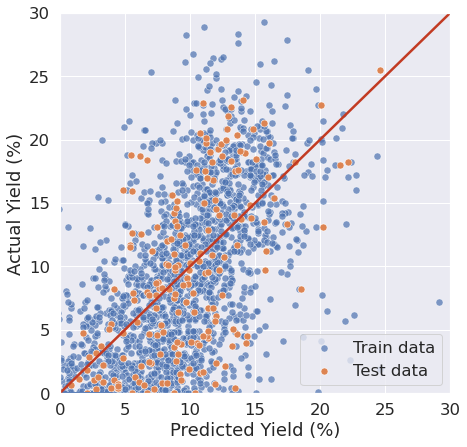

In [44]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
catalyst_x, yield_y = features, labels
# Split the data into training/testing sets
#catalyst_x_train = catalyst_x[:-200]
#catalyst_x_test = catalyst_x[-200:]
catalyst_x_train, catalyst_x_test, yield_y_train, yield_y_test = train_test_split(catalyst_x, yield_y, test_size=0.1)

# Split the targets into training/testing sets
#yield_y_train = yield_y[:-200]
#yield_y_test = yield_y[-200:]


# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(catalyst_x_train, yield_y_train)

# Make predictions using the testing set
yield_y_pred = regr.predict(catalyst_x_test)
yield_y_train_pred = regr.predict(catalyst_x_train)

#print('Coefficients: \n', regr.coef_)
print('Mean squared error (train): %.2f'% mean_squared_error(yield_y_train, yield_y_train_pred))
print('Mean squared error (test): %.2f'% mean_squared_error(yield_y_test, yield_y_pred))
print('Coefficient of determination: %.2f'% r2_score(yield_y_test, yield_y_pred))

cv = KFold(n_splits=10, random_state=10, shuffle=True)
# evaluate model
scores = cross_val_score(regr, catalyst_x, yield_y, scoring="neg_mean_squared_error", cv=cv)
# report performance
print('Crossv-alidated scores:', scores)
predictions = cross_val_predict(regr, catalyst_x, yield_y, cv=cv)
result1 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result2 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result1['Prediction'] = predictions
result1['Actual'] = yield_y
result1['Type'] = 'Train'
result2['Prediction'] = yield_y_pred
result2['Actual'] = yield_y_test
result2['Type'] = 'Test'
result = result1.append(result2)


sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)
    #sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("Set2")
pal=dict(Prediction="#6495ED", Actual="#F08080")
    # Make a custom palette with gendered colors
pal=dict(Train="#6495ED", Test="#F08080")
    
fig, ax = plt.subplots()
sns.axes_style("whitegrid")
        
g1 = sns.scatterplot(data=result1[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=0.7)
g2 = sns.scatterplot(data=result2[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=1)
    # Show the survival probability as a function of age and sex
    
plt.xlabel("Predicted Yield (%)")
plt.ylabel("Actual Yield (%)")
plt.legend(loc=4, labels=['Train data', 'Test data'])
plt.plot([0, 4], [0, 0], linewidth=2)
max_Y = max([max(yield_y_test), max(yield_y_pred), max(yield_y), max(predictions)]) + 1
#plt.ylim([0,max_Y])
#plt.xlim([0,max_Y])
plt.ylim([0,30])
plt.xlim([0,30])
diag = [0.0, max_Y]
plt.plot(diag,diag,'-',color="#C23B23")
fig.set_size_inches(7, 7)
fig.savefig("{}.png".format('Linear Regression'), format='png', dpi=1200)

## Ridge Regression

Mean squared error(train): 25.99
Mean squared error(test): 21.13
Coefficient of determination: 0.44


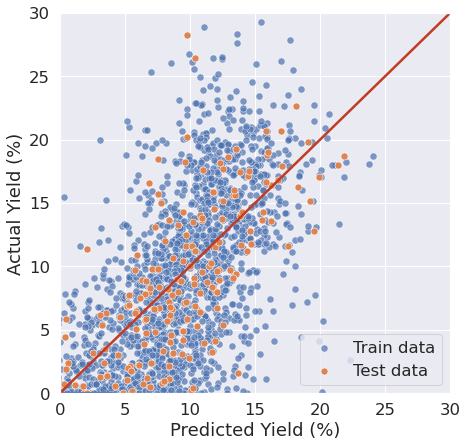

In [48]:
from sklearn.linear_model import Ridge
catalyst_x, yield_y = features, labels
catalyst_x_train, catalyst_x_test, yield_y_train, yield_y_test = train_test_split(catalyst_x, yield_y, test_size=0.1)

Ridgereg = Ridge(alpha=1.0)
Ridgereg.fit(catalyst_x_train, yield_y_train)
yield_y_train_pred = Ridgereg.predict(catalyst_x_train)
yield_y_pred = Ridgereg.predict(catalyst_x_test)
#print('Coefficients: \n', regr.coef_)
print('Mean squared error(train): %.2f'% mean_squared_error(yield_y_train, yield_y_train_pred))
print('Mean squared error(test): %.2f'% mean_squared_error(yield_y_test, yield_y_pred))
print('Coefficient of determination: %.2f'% r2_score(yield_y_test, yield_y_pred))

cv = KFold(n_splits=10, random_state=10, shuffle=True)
# create model
ridge = Ridgereg
# evaluate model
scores = cross_val_score(ridge, catalyst_x, yield_y, scoring="neg_mean_squared_error", cv=cv)
# report performance
#print('Crossv-alidated scores:', scores)
#print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
predictions = cross_val_predict(ridge, catalyst_x, yield_y, cv=cv)

result1 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result2 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result1['Prediction'] = predictions
result1['Actual'] = yield_y
result1['Type'] = 'Train'
result2['Prediction'] = yield_y_pred
result2['Actual'] = yield_y_test
result2['Type'] = 'Test'
result = result1.append(result2)


sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)
    #sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("Set2")
pal=dict(Prediction="#6495ED", Actual="#F08080")
    # Make a custom palette with gendered colors
pal=dict(Train="#6495ED", Test="#F08080")
    
fig, ax = plt.subplots()
sns.axes_style("whitegrid")
        
g1 = sns.scatterplot(data=result1[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=0.7)
g2 = sns.scatterplot(data=result2[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=1)
    # Show the survival probability as a function of age and sex
    
plt.xlabel("Predicted Yield (%)")
plt.ylabel("Actual Yield (%)")
plt.legend(loc=4, labels=['Train data', 'Test data'])
plt.plot([0, 4], [0, 0], linewidth=2)
max_Y = max([max(yield_y_test), max(yield_y_pred), max(yield_y), max(predictions)]) + 1
#plt.ylim([0,max_Y])
#plt.xlim([0,max_Y])
plt.ylim([0,30])
plt.xlim([0,30])
diag = [0.0, max_Y]
plt.plot(diag,diag,'-',color="#C23B23")
fig.set_size_inches(7, 7)
fig.savefig("{}.png".format('Ridge Regression'), format='png', dpi=1200)

## Gaussian Process Regression

Mean squared error(train): 27.20
Mean squared error: 26.46
Coefficient of determination: 0.36


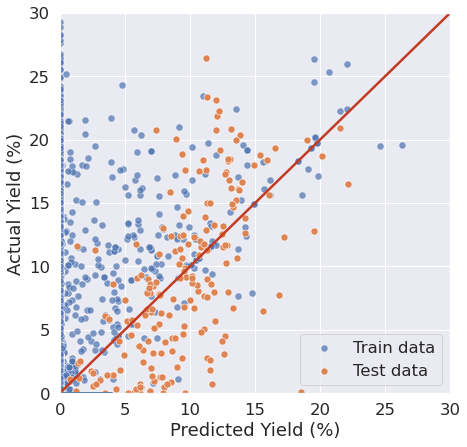

In [68]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
catalyst_x, yield_y = features, labels
catalyst_x_train, catalyst_x_test, yield_y_train, yield_y_test = train_test_split(catalyst_x, yield_y, test_size=0.1)
kernel = DotProduct() + WhiteKernel()
gpr = GaussianProcessRegressor(kernel=kernel, random_state=0).fit(catalyst_x_train, yield_y_train)
yield_y_train_pred = gpr.predict(catalyst_x_train)
yield_y_pred = gpr.predict(catalyst_x_test)

#print('Coefficients: \n', gpr.coef_)
print('Mean squared error(train): %.2f'% mean_squared_error(yield_y_train, yield_y_train_pred))
print('Mean squared error: %.2f'% mean_squared_error(yield_y_test, yield_y_pred))
print('Coefficient of determination: %.2f'% r2_score(yield_y_test, yield_y_pred))


cv = KFold(n_splits=10, random_state=10, shuffle=True)
# create model
GPR = GaussianProcessRegressor()
# evaluate model
scores = cross_val_score(GPR, catalyst_x, yield_y, scoring="neg_mean_squared_error", cv=cv)
# report performance
#print('Crossv-alidated scores:', scores)
#print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
predictions = cross_val_predict(GPR, catalyst_x, yield_y, cv=cv)

result1 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result2 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result1['Prediction'] = predictions
result1['Actual'] = yield_y
result1['Type'] = 'Train'
result2['Prediction'] = yield_y_pred
result2['Actual'] = yield_y_test
result2['Type'] = 'Test'
result = result1.append(result2)

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)
    #sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("Set2")
pal=dict(Prediction="#6495ED", Actual="#F08080")
    # Make a custom palette with gendered colors
pal=dict(Train="#6495ED", Test="#F08080")
    
fig, ax = plt.subplots()
sns.axes_style("whitegrid")
        
g1 = sns.scatterplot(data=result1[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=0.7)
g2 = sns.scatterplot(data=result2[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=1)
    # Show the survival probability as a function of age and sex
    
plt.xlabel("Predicted Yield (%)")
plt.ylabel("Actual Yield (%)")
plt.legend(loc=4, labels=['Train data', 'Test data'])
plt.plot([0, 4], [0, 0], linewidth=2)
max_Y = max([max(yield_y_test), max(yield_y_pred), max(yield_y), max(predictions)]) + 1
#plt.ylim([0,max_Y])
#plt.xlim([0,max_Y])
plt.ylim([0,30])
plt.xlim([0,30])
diag = [0.0, max_Y]
plt.plot(diag,diag,'-',color="#C23B23")
fig.set_size_inches(7, 7)
fig.savefig("{}.png".format('Gaussian Process Regression'), format='png', dpi=1200)

## Random Forest

[ 0.46156532  0.17384171  0.05423717  0.18719941 -0.16023939]
Mean squared error(train): 2.47
Mean squared error(test): 2.55
Coefficient of determination: 0.94


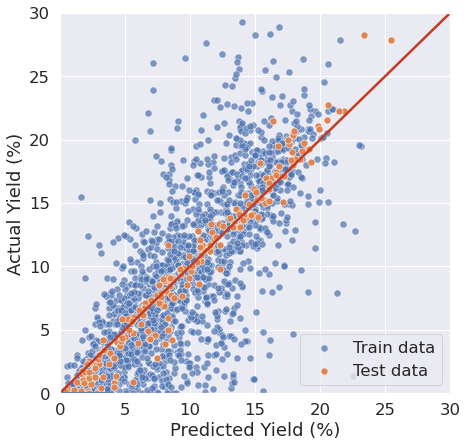

In [69]:
# Use this model to train data and test data
from sklearn.ensemble import RandomForestRegressor
catalyst_x, yield_y = features, labels
catalyst_x_train, catalyst_x_test, yield_y_train, yield_y_test = train_test_split(catalyst_x, yield_y, test_size=0.1)

RandForest = RandomForestRegressor(random_state=2, n_estimators = 1000, max_depth = 100)
RandForest.fit(catalyst_x, yield_y)
scores = cross_val_score(RandForest, catalyst_x, yield_y, cv=5)
print(scores)
yield_y_train_pred = RandForest.predict(catalyst_x_train)
yield_y_pred = RandForest.predict(catalyst_x_test)
train_error = mean_squared_error(yield_y_train, yield_y_train_pred)
test_error = mean_squared_error(yield_y_test, yield_y_pred)
print('Mean squared error(train): %.2f'% train_error)
print('Mean squared error(test): %.2f'% test_error)
print('Coefficient of determination: %.2f'% r2_score(yield_y_test, yield_y_pred))


cv = KFold(n_splits=10, random_state=10, shuffle=True)
# create model
# evaluate model
scores = cross_val_score(RandForest, catalyst_x, yield_y, scoring="neg_mean_squared_error", cv=cv)
# report performance
#print('Crossv-alidated scores:', scores)
#print("Folds: " + str(len(scores)) + ", MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))
predictions = cross_val_predict(RandForest, catalyst_x, yield_y, cv=cv)

result1 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result2 = pd.DataFrame(columns = ['Prediction','Actual','Type'])
result1['Prediction'] = predictions
result1['Actual'] = yield_y
result1['Type'] = 'Train'
result2['Prediction'] = yield_y_pred
result2['Actual'] = yield_y_test
result2['Type'] = 'Test'
result = result1.append(result2)

sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)
    #sns.set_context("paper")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.color_palette("Set2")
pal=dict(Prediction="#6495ED", Actual="#F08080")
    # Make a custom palette with gendered colors
pal=dict(Train="#6495ED", Test="#F08080")
    
fig, ax = plt.subplots()
sns.axes_style("whitegrid")
        
g1 = sns.scatterplot(data=result1[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=0.7)
g2 = sns.scatterplot(data=result2[['Prediction', 'Actual']], x="Prediction", y="Actual", s = 50, ax=ax, alpha=1)
    # Show the survival probability as a function of age and sex
    
plt.xlabel("Predicted Yield (%)")
plt.ylabel("Actual Yield (%)")
plt.legend(loc=4, labels=['Train data', 'Test data'])
plt.plot([0, 4], [0, 0], linewidth=2)
max_Y = max([max(yield_y_test), max(yield_y_pred), max(yield_y), max(predictions)]) + 1
#plt.ylim([0,max_Y])
#plt.xlim([0,max_Y])
plt.ylim([0,30])
plt.xlim([0,30])
diag = [0.0, max_Y]
plt.plot(diag,diag,'-',color="#C23B23")
fig.set_size_inches(7, 7)
fig.savefig("{}.png".format('Random Forest Regression'), format='png', dpi=1200)
